<a href="https://www.kaggle.com/code/jmas19/cardio-good-fitness-business-analysis?scriptVersionId=163770454" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Scenario:
As a newly hired data analyst for a fitness equipment company, I have been tasked with understanding the dataset and give data-driven actionable steps to increase the business' profit margines. This will be achieved by asking the right questions to understand the data.

**This dataset contains customer treadmill purchase information.**

## Data Dictionary
- Product - the model no. of the treadmill
- Age - in no of years, of the customer
- Gender - of the customer
- Education - in no. of years, of the customer
- Marital Status - of the customer
- Usage - Avg. # times the customer wants to use the treadmill every week
- Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
- Income - of the customer
- Miles- expected to run

## Questions to answer
- Which product is the most profitable?
- Which product is the least profitable?
- What is the average use of each product?
- Who buys a treamill more? Male, Female, Single, Partnered, etc...
- What is the most appropriate price point for the products?

In [1]:
# Import Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt # data visualization
import seaborn as sns # data visualization

In [2]:
# Read in csv file
cardio_good_fitness = pd.read_csv('/kaggle/input/cardio-good-fitness/CardioGoodFitness.csv')

## Exploritory Data Analysis (EDA)

In [3]:
# Quick look at the data
cardio_good_fitness.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [4]:
cardio_good_fitness.shape

(180, 9)

In [5]:
cardio_good_fitness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


- Since the column `Fitness` is a self-rating by the customers, it is subjective and, therefore, inaccurate data and must be disregarded.
- The two columns `Usage` and `Miles` are both educated guesses but not factual information they cannot be used.

In [6]:
cardio_good_fitness['Product']

0      TM195
1      TM195
2      TM195
3      TM195
4      TM195
       ...  
175    TM798
176    TM798
177    TM798
178    TM798
179    TM798
Name: Product, Length: 180, dtype: object

In [7]:
cardio_good_fitness.Product.unique()

array(['TM195', 'TM498', 'TM798'], dtype=object)

In [8]:
product_counts = cardio_good_fitness['Product'].value_counts()
product_counts

Product
TM195    80
TM498    60
TM798    40
Name: count, dtype: int64

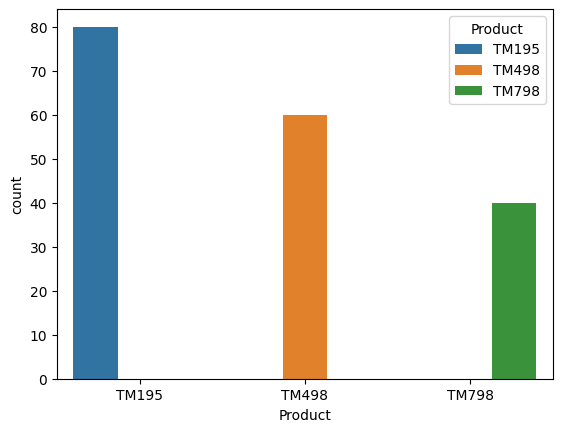

In [9]:
sns.countplot(x='Product', hue='Product', data=cardio_good_fitness)
plt.show()

In [10]:
gender_counts = cardio_good_fitness['Gender'].value_counts()
gender_counts

Gender
Male      104
Female     76
Name: count, dtype: int64

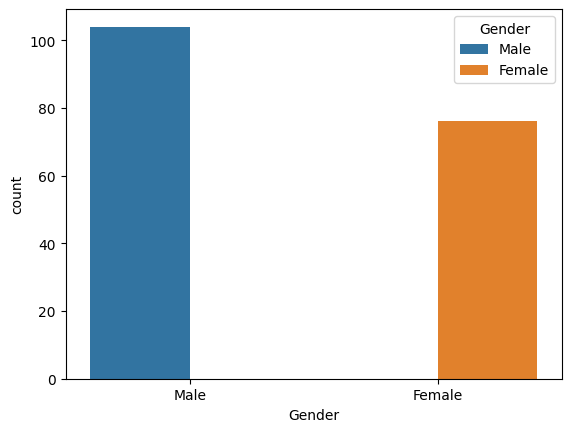

In [11]:
sns.countplot(x='Gender', hue='Gender', data=cardio_good_fitness)
plt.show()

In [12]:
marital_status_counts = cardio_good_fitness['MaritalStatus'].value_counts()
marital_status_counts

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

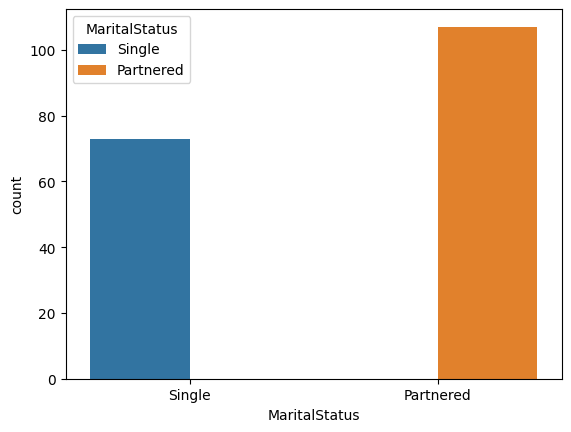

In [13]:
sns.countplot(x='MaritalStatus', hue='MaritalStatus', data=cardio_good_fitness)
plt.show()

After exploring a few columns we see the number of unique products (3), the number of times each product sold (`product_counts`), which gender is most likely to purchase a product (`gender_counts`), and the marital status of who purchased a product (`marital_status_counts`)

With this information, we can narrow down who to target for marketing. We now know the company should target men in a relationship rather than single men. Having a better idea of their clientele helps the company create an avatar of their ideal customer.

In [14]:
max_income = cardio_good_fitness['Income'].max()
min_income = cardio_good_fitness['Income'].min()

avg_income = cardio_good_fitness['Income'].mean()
rounded_avg_income = round(avg_income, 2)

print(f"Max Income: ${max_income}\nMin Income: ${min_income}\nAverage Income: ${rounded_avg_income}")

Max Income: $104581
Min Income: $29562
Average Income: $53719.58


Since the actual price of the products is not given, I assume that the lower the number, the cheaper it is. That would make the TM195 the most affordable of the 3 and the TM798 the most expensive. 

I understand that fitness equipment is generally expensive, and treadmills hover around 2,000.00. The average income of 53,719.58 strongly explains why TM195 has the highest number of units sold.

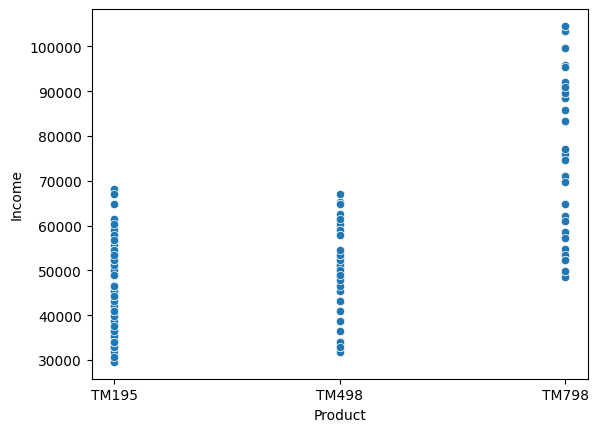

In [15]:
sns.scatterplot(x='Product', y='Income', data=cardio_good_fitness)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


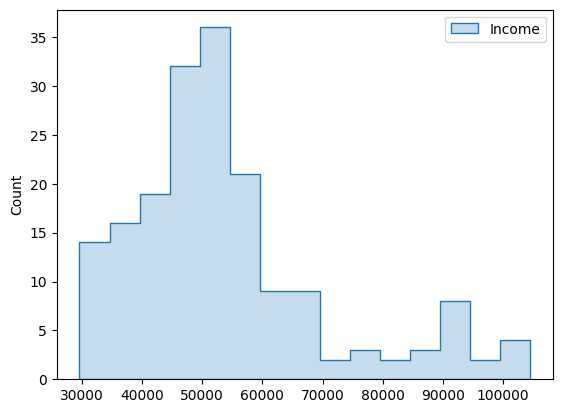

In [16]:
sns.histplot(data=cardio_good_fitness[['Income','Product']], element="step")
plt.show()

This histogram shows that those in the bottom 50% of income bought the most products, and the scatter plot above shows that those in the same group bought TM195 and TM498 the most.

More questions arise, such as why those with high incomes are not purchasing a treadmill? Another one is whether it would be advantageous for the company to lower the price of the TM798 to sell that product more, or is that unnecessary? These questions cannot be answered without more information because there are too many variables to factor in. Therefore, further research needs to be completed to answer these questions and any other questions that may arise.

This information builds on the avatar that the company should be targeting to drive sales.

In [17]:
max_age = cardio_good_fitness['Age'].max()
min_age = cardio_good_fitness['Age'].min()

avg_age = cardio_good_fitness['Age'].mean()
rounded_avg_age = round(avg_age, 2)

print(f"Max Age: {max_age}\nMin Age: {min_age}\nAverage Age: {rounded_avg_age}")

Max Age: 50
Min Age: 18
Average Age: 28.79


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


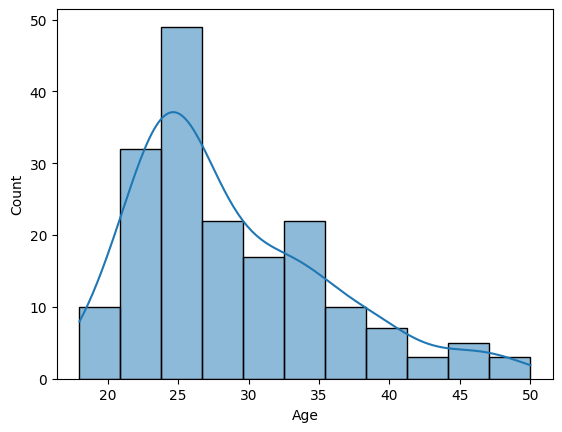

In [18]:
sns.histplot(x='Age', data=cardio_good_fitness, kde=True)
plt.show()

After exploring the age range of the customers, we see the youngest is 18, and the oldest is 50, with an average of 28.79, and most of the customers are around 25 years old. This is also in line with the income being in the bottom 50%.

In [19]:
max_education = cardio_good_fitness['Education'].max()
min_education = cardio_good_fitness['Education'].min()

avg_education = cardio_good_fitness['Education'].mean()
rounded_avg_education = round(avg_education, 2)

print(f"Max Education: {max_education}\nMin Education: {min_education}\nAverage Education: {rounded_avg_education}")

Max Education: 21
Min Education: 12
Average Education: 15.57


Because the education is numerical, 12 represents a senior in high school. Understanding that a person with a bachelor’s degree or 4 years of college would be 16. In addition, 2 years of grad school would be 18, and then a Ph.D./JD/MD would be greater than or equal to 19. Therefore, the average education of the customers is just shy of a bachelor’s degree.

## Conclusion

In conclusion, with all the valuable data explored, the company can develop a clear picture of their customer's avatar and understand who to target with their advertising to generate more sales. They now know the ideal customer would be a male in a relationship in their mid-twenties and graduated college with a bachelor’s. The best products to sell to this avatar would be TM195 and TM498.